<a href="https://colab.research.google.com/github/Yoyo1505/Noriega-Zaldiavr-Jorge-Armando_INV_OPS/blob/main/inventario_descuento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inventario con descuento

In [3]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

## Ejemplo

LubeCar se especializa en cambios rápidos de aceite para motor de automóvil. El servicio
compra aceite para motor a granel, a $\$3$ por galón. Si LubeCar compra más de 100 galones,
obtiene un descuento de $\$2.50$ por galón. En el servicio se atienden unos 150 autos diarios, y
cada cambio de aceite requiere de 1.25 galones. LubeCar guarda el aceite a granel con un costo
de $\$0.02$ por galón y por día. También, el costo de colocar un pedido de aceite a granel es
de $\$20$. Hay un tiempo de 2 días para la entrega. Determine la política óptima de inventario.

In [4]:
# Definimos los simbolos y funciones
c1, c2, d, h, K, L, Q, Qop, t1=sp.symbols("c1, c2, d, h, K, L, Q, Qop, t1")
T=sp.Function("T")
Qo=sp.Function("Qo")

In [5]:
c1=3
c2=2.5
d=187.5
h=0.02
K=20
L=2
q=1000
#Qop=612.3724

Paso 1. Calcular Q óptimo

In [6]:
def Qop(K,d,h):
    return np.sqrt((2*K*d)/h)

In [7]:
Qo=Qop(K,d,h)

In [10]:
print(Qo)

612.3724356957945


Paso 2. Determinar la zona en que se encuentra q

In [11]:
def T(Q):
    if Q <= q:
        f=c1*d+K*d/Q+h*Q/2
    else:
        f=c2*d+K*d/Q+h*Q/2
    return f

In [12]:
eq=sp.Eq(Q**2 + (2/h)*(c2*d-T(Qo))*Q+2*K*d/h,0)

In [13]:
eq

Eq(Q**2 - 10599.7448713916*Q + 375000.0, 0)

In [14]:
sol=sp.solve(eq,Q)

In [15]:
sol

[35.4970848447485, 10564.2477865469]

In [16]:
s=sol[1] #Aquí debemos seleccionar la solución que sea mayor que q

In [17]:
s

10564.2477865469

Como $Qop=612 < q=1000 < Q = 10564$, q está en la zona II. Por tanto:

Qoo = q

**Ejercicio 1:** Escriba una función que calcula la Q óptima. Es decir, que resuelva de manera interna la ecuación cuadrática y seleccione la solución correcta e indique en qué región está.

In [34]:
import numpy as np
import sympy as sp

def simplified_optimal_Q_calc(c1, c2, d, h, K, q_breakpoint):
    Q_eoq = np.sqrt((2 * K * d) / h)

    def total_cost(Q_val):
        return c1 * d + K * d / Q_val + h * Q_val / 2 if Q_val <= q_breakpoint else c2 * d + K * d / Q_val + h * Q_val / 2

    tc_at_q_eoq = total_cost(Q_eoq)

    Q_sym = sp.symbols('Q')
    A = (2 / h) * (c2 * d - tc_at_q_eoq)
    B = (2 * K * d) / h

    eq = sp.Eq(Q_sym**2 + A * Q_sym + B, 0)
    solutions = sp.solve(eq, Q_sym)
    real_solutions = [float(s) for s in solutions if s.is_real]

    if not real_solutions:
        return None, "No hay soluciones reales para la ecuación cuadrática"

    Q_sol_max = max(real_solutions)

    if Q_eoq >= q_breakpoint:
        optimal_Q = Q_eoq
        region = "Descuento (Q_EOQ está en el rango de descuento)"
    else:
        if q_breakpoint <= Q_sol_max:
            optimal_Q = q_breakpoint
            region = "Descuento (punto de quiebre seleccionado)"
        else:
            optimal_Q = Q_eoq
            region = "Sin Descuento (Q_EOQ seleccionado)"

    return optimal_Q, region

optimal_Q_val_simple, region_info_simple = simplified_optimal_Q_calc(c1, c2, d, h, K, q)
print(f"La Q óptima (simplificada) es: {optimal_Q_val_simple:.2f}")
print(f"La política óptima de inventario está en la región (simplificada): {region_info_simple}")

La Q óptima (simplificada) es: 1000.00
La política óptima de inventario está en la región (simplificada): Descuento (punto de quiebre seleccionado)


Para calcular el tiempo de retraso efectivo

In [20]:
t1=Qo/d
np.floor(L/t1)

np.float64(0.0)

Por tanto la política del inventario debe ser:

In [ ]:
print("Pedir", q, "cuando el inventario caiga a:", L*d)

Pdir 1000 cuando el inventario caiga a: 375.0


**Ejercicio 2:** Escribir una función que reciba los datos del problema y devuelva la política óptima del inventario.

In [33]:
def get_optimal_inventory_policy(c1, c2, d, h, K, L, q_breakpoint):
    optimal_Q, region_info = calculate_optimal_Q_notebook_method(c1, c2, d, h, K, q_breakpoint)
    reorder_point = L * d

    policy_description = (
        f"Política óptima de inventario:\n"
        f"  Pedir: {optimal_Q:.2f} galones\n"
        f"  Cuando el inventario caiga a: {reorder_point:.2f} galones\n"
        f"  Región: {region_info}"
    )
    return policy_description
policy = get_optimal_inventory_policy(c1, c2, d, h, K, L, q)
print(policy)

Política óptima de inventario:
  Pedir: 1000.00 galones
  Cuando el inventario caiga a: 375.00 galones
  Región: Descuento (punto de quiebre seleccionado)


Para graficar

In [30]:
def T(Q, c1, c2, h, K, d, q):
    Q = np.array(Q)

    c = np.where(Q <= q, c1, c2)   # opciones

    return c*d + (K*d)/Q + (h*Q)/2

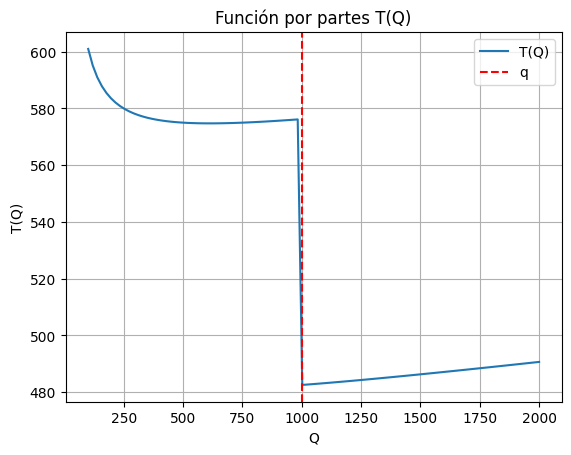

In [32]:
Q_vals = np.linspace(100, 2000, 100)

T_vals = T(Q_vals, c1, c2, h, K, d, q)

plt.plot(Q_vals, T_vals, label="T(Q)")
plt.axvline(q, color='red', linestyle='--', label="q")  # marca el punto de quiebre
plt.xlabel("Q")
plt.ylabel("T(Q)")
plt.title("Función por partes T(Q)")
plt.legend()
plt.grid(True)
plt.show()